# Задача классификации. Метод k ближайших соседей (kNN)



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
# подключение библиотеки с методом Ближайшего соседа

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stepik126333/students.csv', delimiter=',')
df_cut=df[['Growth','Weight','Sex']]
df_cut=df_cut.dropna()

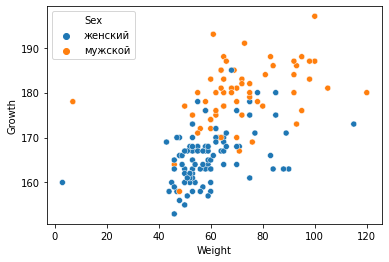

In [5]:
sns.scatterplot(data=df_cut, x='Weight', y='Growth', hue='Sex')

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_cut[['Weight', 'Growth']].values.reshape(-1, 2))
arr=scaler.transform(df_cut[['Weight', 'Growth']].values.reshape(-1, 2))


In [ ]:
arr

Гипотеза: мужчины и женщины образуют два облака. Причем для многих точек выполнено условие: если соседние точки мужчины (женщины), то и данная точка - мужчина (женщина)

In [9]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(arr, y=df_cut['Sex'].values)

KNeighborsClassifier(n_neighbors=3)

Загружаем тестовую выбоку

In [10]:
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stepik126333/students_test.csv', delimiter=',')
df_test_cut=df_test[['Growth','Weight','Sex']]
df_test_cut=df_test_cut.dropna()

In [11]:
arr_test=scaler.transform(df_test_cut[['Weight', 'Growth']].values.reshape(-1, 2))

Внимание: через функцию predict прогоняем объекты **тестовой** выборки

In [12]:
df_test_cut['Predicted']=model.predict(arr_test)

Метрики качества задачи классификации

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [14]:
print(accuracy_score(df_test_cut['Predicted'], df_test_cut['Sex']))
# это процент правильно классифицированных объектов

0.8701298701298701


In [15]:
print(precision_score(df_test_cut['Predicted'], df_test_cut['Sex'],average=None, zero_division=1))
print(recall_score(df_test_cut['Predicted'], df_test_cut['Sex'],average=None, zero_division=1))

[0.85106383 0.9       ]
[0.93023256 0.79411765]


In [18]:
pd.crosstab(df_test_cut['Predicted'],df_test_cut['Sex'])

Sex,женский,мужской
Predicted,,
женский,40,3
мужской,7,27


In [22]:
df_test_cut['Code']='0'
df_test_cut.loc[(df_test_cut['Sex']=='мужской') & (df_test_cut['Predicted']=='женский'),'Code']='1'
df_test_cut.loc[(df_test_cut['Sex']=='женский') & (df_test_cut['Predicted']=='мужской'),'Code']='2'

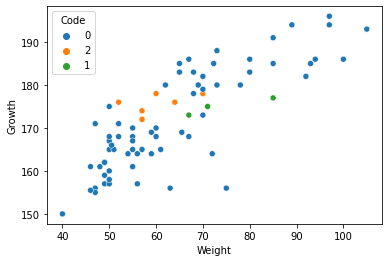

In [23]:
sns.scatterplot(data=df_test_cut, x='Weight', y='Growth', hue='Code')

In [24]:
df_cut=df[['Hair length','Shoe size','Sex']]


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_cut[['Hair length','Shoe size']].values.reshape(-1, 2))
arr=scaler.transform(df_cut[['Hair length','Shoe size']].values.reshape(-1, 2))


In [26]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(arr, y=df_cut['Sex'].values)

KNeighborsClassifier()

In [27]:
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stepik126333/students_test.csv', delimiter=',')
df_test_cut=df_test[['Hair length','Shoe size','Sex']]
df_test_cut=df_test_cut.dropna()

In [28]:
arr_test=scaler.transform(df_test_cut[['Hair length','Shoe size']].values.reshape(-1, 2))

In [29]:
df_test_cut['Predicted']=model.predict(arr_test)

In [30]:
pd.crosstab(df_test_cut['Predicted'],df_test_cut['Sex'])

Sex,женский,мужской
Predicted,,
женский,61,1
мужской,1,35
